## CS6650W Homework 1 (Diwali 2024 Semester)
#### Smartphone based Photoplethysmography (PPG)
The task is to develop a PPG system using a smartphone device to capture blood flow related imagery data and post-process such data to estimate the pulse or heart beat rate of the subject. You need to implement various features pertaining to the above task in this notebook. Create a directory, <b><your_roll>_CS6650D24</b>. Place this notebook in that directory.

#### A. Warmup - Data Collection [10 points]
Use your smartphone’s camera to capture the blood-flow video. Turn on the flash while recording and turn it off once done. Capture the video using the maximum frame rate that is available in your phone (e.g.60 fps or 30 fps). The same holds for image resolution. The captured videos are saved on the device’s SD card. Collect 3 such videos (each exactly 10 seconds long, if longer just limit to N frames while processing, where N = 10*frames_per_second) under the following conditions. Make sure that all video capture configurations are kept the same across the cases (resolution, fps).
* resting on bed (1.mp4)
* after a moderate walk (2.mp4), and
* after a vigorous exercise (3.mp4).

Copy these videos locally to your project folder in a subdirectory "ppgvideos" - name them (1/2/3).mp4. Don’t move your finger/hand randomly or press too hard against the camera or flash while recording, little randomness is okay. Write a script to read the three videos and store the frames (2D vector of (R G B) values).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks
from sklearn.metrics import roc_curve, auc
import seaborn as sns


In [2]:
## your snippet to read the three videos, display the number of frames and resolution in each video

# videoPaths = ["ppgvideos/1.mp4", "ppgvideos/2.mp4", "ppgvideos/3.mp4"]
# videoPaths = ["ppgvideos/original/1.mp4", "ppgvideos/original/2.mp4", "ppgvideos/original/3.mp4"]
# videoPaths = ["ppgvideos/converted/1.mp4", "ppgvideos/converted/2.mp4", "ppgvideos/converted/3.mp4"]
videoPaths = ["ppgvideos/finger/1.mp4", "ppgvideos/finger/2.mp4", "ppgvideos/finger/3.mp4"]
# videoPaths = ["ppgvideos/wrist/1.mp4", "ppgvideos/wrist/2.mp4", "ppgvideos/wrist/3.mp4"]
# videoPaths = ["ppgvideos/videos/00000/1.mp4", "ppgvideos/videos/00014/2.mp4", "ppgvideos/videos/00014/3.mp4"]
# videoPaths = ["ppgvideos/videos/00001/1.mp4", "ppgvideos/videos/00013/2.mp4", "ppgvideos/videos/00013/3.mp4"]
# videoPaths = ["ppgvideos/videos/00002/1.mp4", "ppgvideos/videos/00012/2.mp4", "ppgvideos/videos/00012/3.mp4"]
# videoPaths = ["ppgvideos/videos/00003/1.mp4", "ppgvideos/videos/00011/2.mp4", "ppgvideos/videos/00011/3.mp4"]
# videoPaths = ["ppgvideos/videos/00004/1.mp4", "ppgvideos/videos/00010/2.mp4", "ppgvideos/videos/00010/3.mp4"]
# videoPaths = ["ppgvideos/videos/00006/1.mp4", "ppgvideos/videos/00009/2.mp4", "ppgvideos/videos/00009/3.mp4"]
# videoPaths = ["ppgvideos/videos/00007/1.mp4", "ppgvideos/videos/00008/2.mp4", "ppgvideos/videos/00008/3.mp4"]
# videoPaths = ["ppgvideos/videos/00008/1.mp4", "ppgvideos/videos/00007/2.mp4", "ppgvideos/videos/00007/3.mp4"]
# videoPaths = ["ppgvideos/videos/00009/1.mp4", "ppgvideos/videos/00006/2.mp4", "ppgvideos/videos/00006/3.mp4"]
# videoPaths = ["ppgvideos/videos/00010/1.mp4", "ppgvideos/videos/00004/2.mp4", "ppgvideos/videos/00004/3.mp4"]
# videoPaths = ["ppgvideos/videos/00011/1.mp4", "ppgvideos/videos/00003/2.mp4", "ppgvideos/videos/00003/3.mp4"]
# videoPaths = ["ppgvideos/videos/00012/1.mp4", "ppgvideos/videos/00002/2.mp4", "ppgvideos/videos/00002/3.mp4"]
# videoPaths = ["ppgvideos/videos/00013/1.mp4", "ppgvideos/videos/00001/2.mp4", "ppgvideos/videos/00001/3.mp4"]
# videoPaths = ["ppgvideos/videos/00014/1.mp4", "ppgvideos/videos/00000/2.mp4", "ppgvideos/videos/00000/3.mp4"]
# This is a map from the video ID to its list of frames.
videoFrames = {"1":[], "2":[], "3":[]}

# Dictionary to store FPS and frame count for each video
framesPerSecondValues = {"1": 0, "2": 0, "3": 0}
frameCountValues = {"1": 0, "2": 0, "3": 0}
frameHeightValues = {"1": 0, "2": 0, "3": 0}
frameWidthValues = {"1": 0, "2": 0, "3": 0}

for index, videoPath in enumerate(videoPaths):
    cap = cv2.VideoCapture(videoPath)

    #some sample constants in openCV, check out for more
    framesPerSecond = cap.get(cv2.CAP_PROP_FPS)
    frameCount = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    frameWidth = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    frameHeight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    # Store fps and frame count in the corresponding dictionaries
    framesPerSecondValues[str(index + 1)] = framesPerSecond
    frameCountValues[str(index + 1)] = frameCount
    frameHeightValues[str(index + 1)] = frameHeight
    frameWidthValues[str(index + 1)] = frameWidth
    
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            videoFrames[str(index+1)].append(frame)
        else:
            break
    cap.release()
    cv2.destroyAllWindows()

    print(f"{videoPath}, Frame Count: {frameCount}, FPS: {framesPerSecond}, Height: {frameHeight}, Width: {frameWidth}")
    # print(videoPath+", Frame Count: "+str(cnt)+", FPS: "+str(fps))
    # print(videoPath+", Height: "+str(f_h)+", Width: "+str(f_w))
    # for index, frames in videoFrames.items():
    #     print("index : " + index + " frames : "+ str(len(frames)))
    #     for frame in frames:
    #         print("frame ", frame)

ppgvideos/finger/1.mp4, Frame Count: 732.0, FPS: 23.994029900756935, Height: 1920.0, Width: 1080.0
ppgvideos/finger/2.mp4, Frame Count: 732.0, FPS: 23.994029900756935, Height: 1920.0, Width: 1080.0
ppgvideos/finger/3.mp4, Frame Count: 732.0, FPS: 23.994029900756935, Height: 1920.0, Width: 1080.0


#### B. Sensing Metric [5 points]
Design your sensing metric. Note that each frame is a 2D vector of size [AxB], containing A.B pixels, where a pixel at location [i,j] is denoted by the 3-tuple [B, G, R] where B, G, and R are bytes (8 bits, range 0 - 255) representing intensity of each color - Blue, Green and Red. The frame intensity metric is an aggregate statistical measure on the pixel values. (you can even consider R, G and B streams separately or consider greyscale frames). Best to have a normalized value between zero and one. [5 points]

In [3]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

def calculate_intensity_metric(frame):
    # Split the frame into R, G, B channels
    blue, green, red = cv2.split(frame)
    # print("Red : " + str(R) + " Green : " + str(G) + " Blue : " + str(B))
    # Calculate the average intensity for each channel
    averageIntensityRed = np.mean(red)
    averageIntensityGreen = np.mean(green)
    averageIntensityBlue = np.mean(blue)
    # print("Mean Red : " + str(averageIntensityRed) + " Mean Green : " + str(averageIntensityGreen) + " Mean Blue : " + str(averageIntensityBlue))
    # Normalize the intensities between 0 and 1
    normalizedIntensityRed = averageIntensityRed / 255.0
    normalizedIntensityGreen = averageIntensityGreen / 255.0
    normalizedIntensityBlue = averageIntensityBlue / 255.0
    # print("Normalize Red : " + str(normalizedIntensityRed) + " Normalize Green : " + str(normalizedIntensityGreen) + " Normalize Blue : " + str(normalizedIntensityBlue))
    # Define weights for combining R, G, B channels
    weightRed, weightGreen, weightBlue = 0.6, 0.2, 0.2
    
    # Calculate the Frame Intensity Metric (FIM)
    frameIntensityMetric = weightRed * normalizedIntensityRed + weightGreen * normalizedIntensityGreen + weightBlue * normalizedIntensityBlue
    
    return frameIntensityMetric

# def calculate_intensity_metric(frame):
#     # Convert the frame to greyscale
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     print("Gray Frame : " + str(gray_frame))
#     # Calculate the average intensity of the greyscale frame
#     avg_intensity = np.mean(gray_frame)
#     # print("Average Intensity : " + str(avg_intensity))
#     # Normalize the intensity to a value between 0 and 1
#     normalized_intensity = avg_intensity / 255.0
    
#     return normalized_intensity

intensityMetrics = {"1":[], "2":[], "3":[]}
# print("videoFrames : " + str(videoFrames) )
for videoIndex, frames in videoFrames.items():
    # print("index : " + video_index + " frames : "+ str(len(frames)))
    for frameIndex, frame in enumerate(frames):
        # print("frame ", frame)
        # Calculate the intensity metric for the current frame
        intensityMetric = calculate_intensity_metric(frame)
        intensityMetrics[videoIndex].append(intensityMetric)
        print(f"Video {videoIndex}, Frame {frameIndex + 1}, Intensity Metric: {intensityMetric:.4f}")

# for index, intensity_metrics in intensity_metric.items():
#     print("index : " + index + " intensity_metrices : " + str(len(intensity_metrics)))
#     for im in intensity_metrics:
#         print(f"Frame Intensity Metric : {im:.4f}")


Video 1, Frame 1, Intensity Metric: 0.5029
Video 1, Frame 2, Intensity Metric: 0.5033
Video 1, Frame 3, Intensity Metric: 0.5037
Video 1, Frame 4, Intensity Metric: 0.5044
Video 1, Frame 5, Intensity Metric: 0.5045
Video 1, Frame 6, Intensity Metric: 0.5058
Video 1, Frame 7, Intensity Metric: 0.5058
Video 1, Frame 8, Intensity Metric: 0.5078
Video 1, Frame 9, Intensity Metric: 0.5084
Video 1, Frame 10, Intensity Metric: 0.5101
Video 1, Frame 11, Intensity Metric: 0.5112
Video 1, Frame 12, Intensity Metric: 0.5119
Video 1, Frame 13, Intensity Metric: 0.5129
Video 1, Frame 14, Intensity Metric: 0.5141
Video 1, Frame 15, Intensity Metric: 0.5145
Video 1, Frame 16, Intensity Metric: 0.5138
Video 1, Frame 17, Intensity Metric: 0.5107
Video 1, Frame 18, Intensity Metric: 0.5080
Video 1, Frame 19, Intensity Metric: 0.5061
Video 1, Frame 20, Intensity Metric: 0.5043
Video 1, Frame 21, Intensity Metric: 0.5033
Video 1, Frame 22, Intensity Metric: 0.5035
Video 1, Frame 23, Intensity Metric: 0.50

#### C. Temporal Variation of Intensity Value [10 points]
Plot your frame intensity metric vs. time for a random 5-second chunk of the three videos. The X-axis should be common for all three subplots (stacked vertically) with separate Y-axes based on your intensity metric. Appreciate the fact that vigorous exercise leads to rapid intensity variations compared to while resting. What is the BPM value for the three cases (manually counting is okay)?

chunks.len : 119
chunk 0.512042810835754
chunk 0.5134405909586056
chunk 0.5146805260530138
chunk 0.5157954849763979
chunk 0.5173004289215686
chunk 0.5165785626210361
chunk 0.5116886180706851
chunk 0.508790483160857
chunk 0.5078838488713386
chunk 0.5050679538096102
chunk 0.5045753313362382
chunk 0.5046169268942146
chunk 0.5047523106541999
chunk 0.505183966503268
chunk 0.5053558528503994
chunk 0.5056105305162187
chunk 0.5061482971738078
chunk 0.5072459290274752
chunk 0.5081177000121035
chunk 0.5086577353395062
chunk 0.5096667237805615
chunk 0.51096083651053
chunk 0.5113545940752844
chunk 0.51136544458061
chunk 0.5122185465081094
chunk 0.5129438642277899
chunk 0.5136953461631566
chunk 0.5147281110052045
chunk 0.5157136490861777
chunk 0.5117476371489954
chunk 0.5072011169359719
chunk 0.5064165486564997
chunk 0.5038654396635197
chunk 0.5024221545176712
chunk 0.503339387406197
chunk 0.5033331116860323
chunk 0.5037983921114741
chunk 0.504155030939845
chunk 0.5044069765946502
chunk 0.504811007

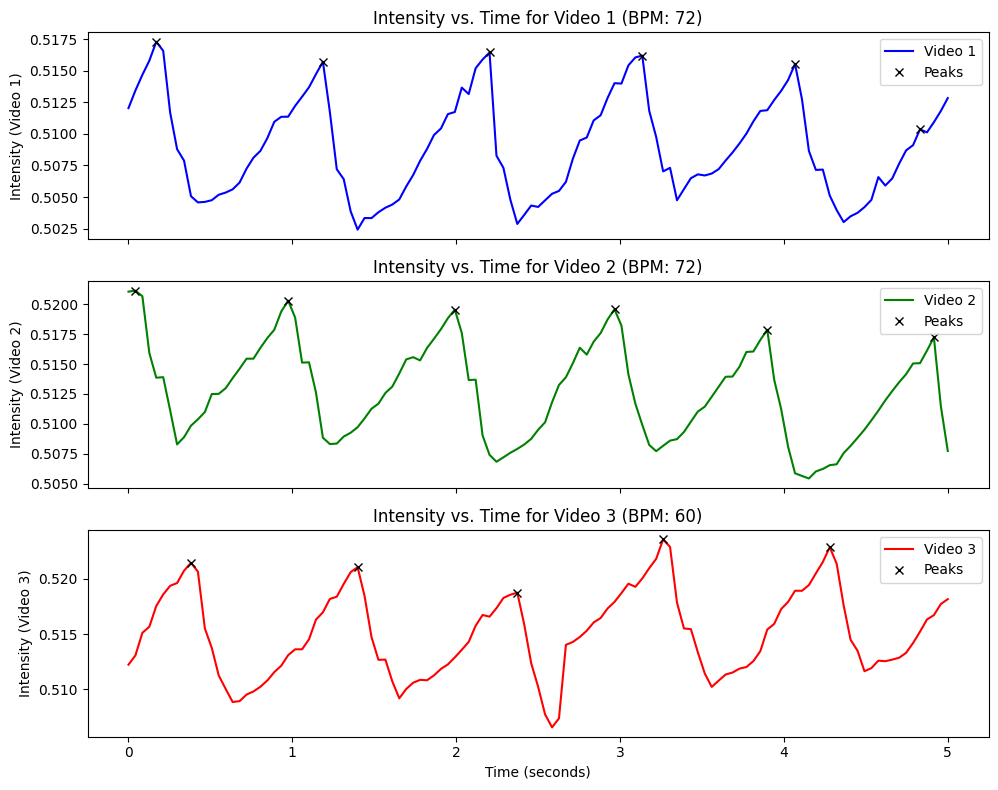

Video 1 - Estimated BPM: 72
Video 2 - Estimated BPM: 72
Video 3 - Estimated BPM: 60


In [4]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

# Extract a random 5-second chunk of frames from each video
def get_random_chunk(intensityMetrics, videoIndex, fps, duration=5):
    # Calculate the number of frames in the chunk (fps * duration)
    chunkSize = int(fps * duration)
    
    # Ensure we have enough frames to select a random chunk
    if len(intensityMetrics[videoIndex]) < chunkSize:
        raise ValueError(f"Video {videoIndex} has fewer frames than needed for a {duration}-second chunk.")
    
    # Select a random starting frame index such that we can extract a full 5-second chunk
    startFrame = random.randint(0, len(intensityMetrics[videoIndex]) - chunkSize)
    
    # Extract the chunk of intensity values
    return intensityMetrics[videoIndex][startFrame:startFrame + chunkSize]

# Create dictionaries to store the chunks and time axes for each video
chunks = {"1": [], "2": [], "3": []}
timeAxes = {"1": [], "2": [], "3": []}

# Dictionary to store colors for each video
plotColors = {"1": 'blue', "2": 'green', "3": 'red'}

# Dictionary to store BPM values for each video
bpmValues = {"1": 0, "2": 0, "3": 0}

# Extract 5-second chunks from the intensity metrics for each video
for videoIndex in intensityMetrics:
    chunks[videoIndex] = get_random_chunk(intensityMetrics, videoIndex, framesPerSecondValues[videoIndex])
    print("chunks.len : " + str(len(chunks[videoIndex])))
    for chunk in chunks[videoIndex]:
        print("chunk " + str(chunk))

    timeAxes[videoIndex] = np.linspace(0, 5, len(chunks[videoIndex]))
    print("timeAxes.len : " + str(len(timeAxes[videoIndex])))
    for timeAxe in timeAxes[videoIndex]:
        print("timeAxes " + str(timeAxe))

    # Calculate the peaks in the chunk to estimate BPM
    peaks, _ = find_peaks(chunks[videoIndex], distance=framesPerSecondValues[videoIndex] * 0.5)
    totalPeaks = len(peaks)
    
    # Estimate BPM based on number of peaks in 5 seconds
    bpmValues[videoIndex] = totalPeaks * 12  # 12 because 60 / 5 seconds = 12

# Plot the intensity metrics over time for the three videos
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Iterate over each video to plot the data and show peaks
for i, videoIndex in enumerate(intensityMetrics):
    ax[i].plot(timeAxes[videoIndex], chunks[videoIndex], color=plotColors[videoIndex], label=f"Video {videoIndex}")
    
    # Mark the peaks
    peaks, _ = find_peaks(chunks[videoIndex], distance=framesPerSecondValues[videoIndex] * 0.5)
    ax[i].plot(timeAxes[videoIndex][peaks], np.array(chunks[videoIndex])[peaks], "x", color='black', label="Peaks")
    
    ax[i].set_ylabel(f"Intensity (Video {videoIndex})")
    ax[i].set_title(f"Intensity vs. Time for Video {videoIndex} (BPM: {bpmValues[videoIndex]})")
    ax[i].legend()

# Common X-axis label
plt.xlabel("Time (seconds)")

# Show the plot
plt.tight_layout()
plt.show()

# Output BPM values for each video
for videoIndex, bpm in bpmValues.items():
    print(f"Video {videoIndex} - Estimated BPM: {bpm}")


#### D. Likelihood Distributions [20 marks]
In the 5-second chunks taken above, choose 20 frames where your sensing metric is close to the local maximum (Case1), and 20 frames where it is close to the local minimum (Case2). Plot the histograms on "R", "G" and "B" values for each pixel in the 20 frames for the two cases 1 and 2. For each video there will be 3 figures, each for "R", "G" and "B". Which one produces the most separable distributions?

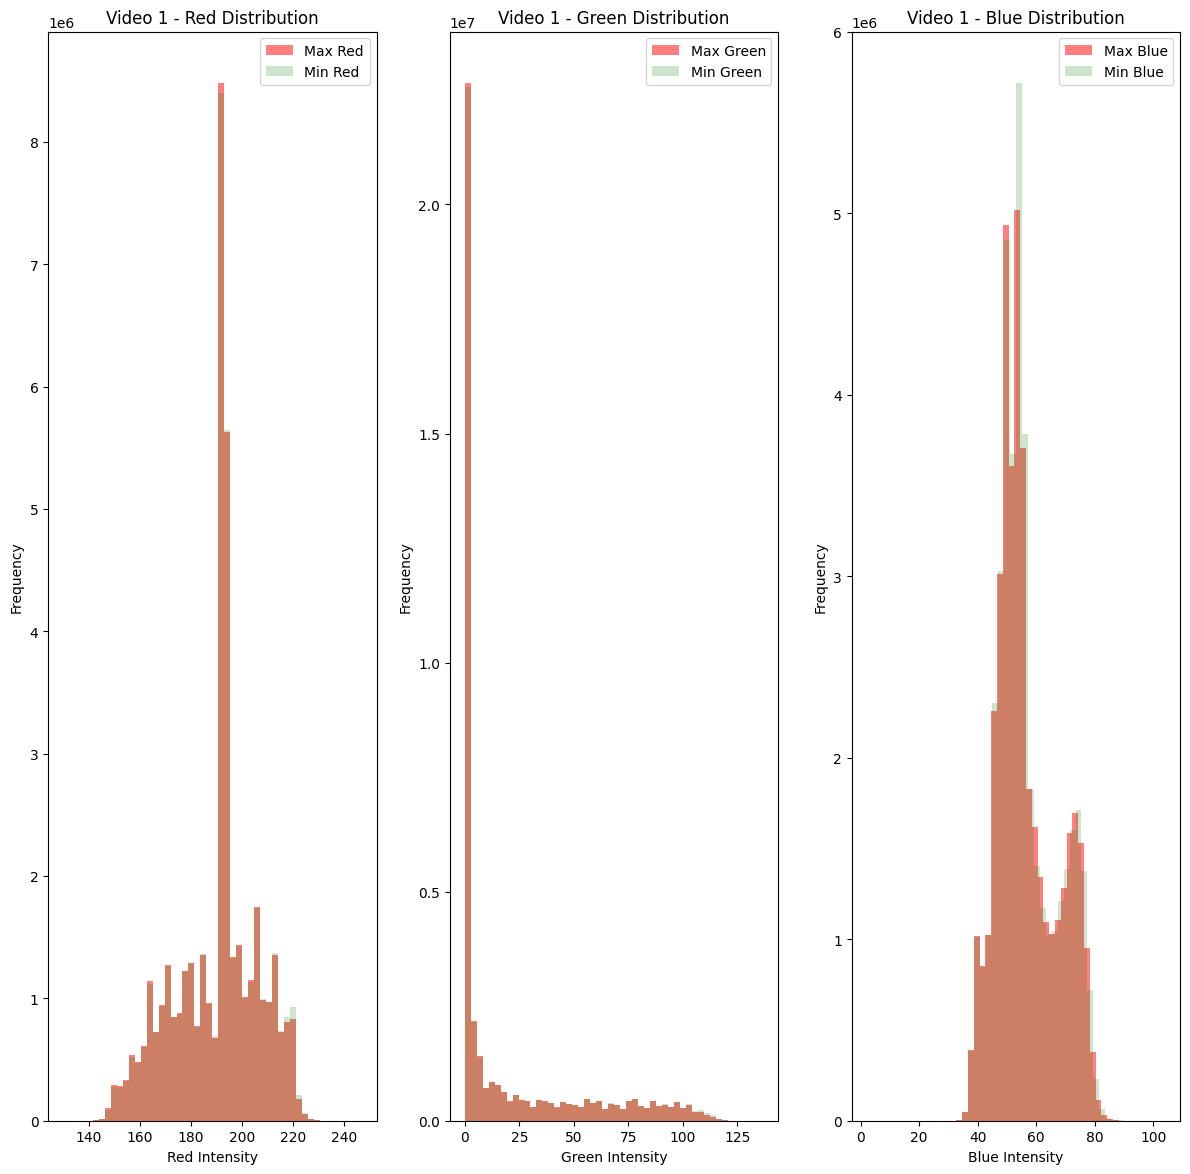

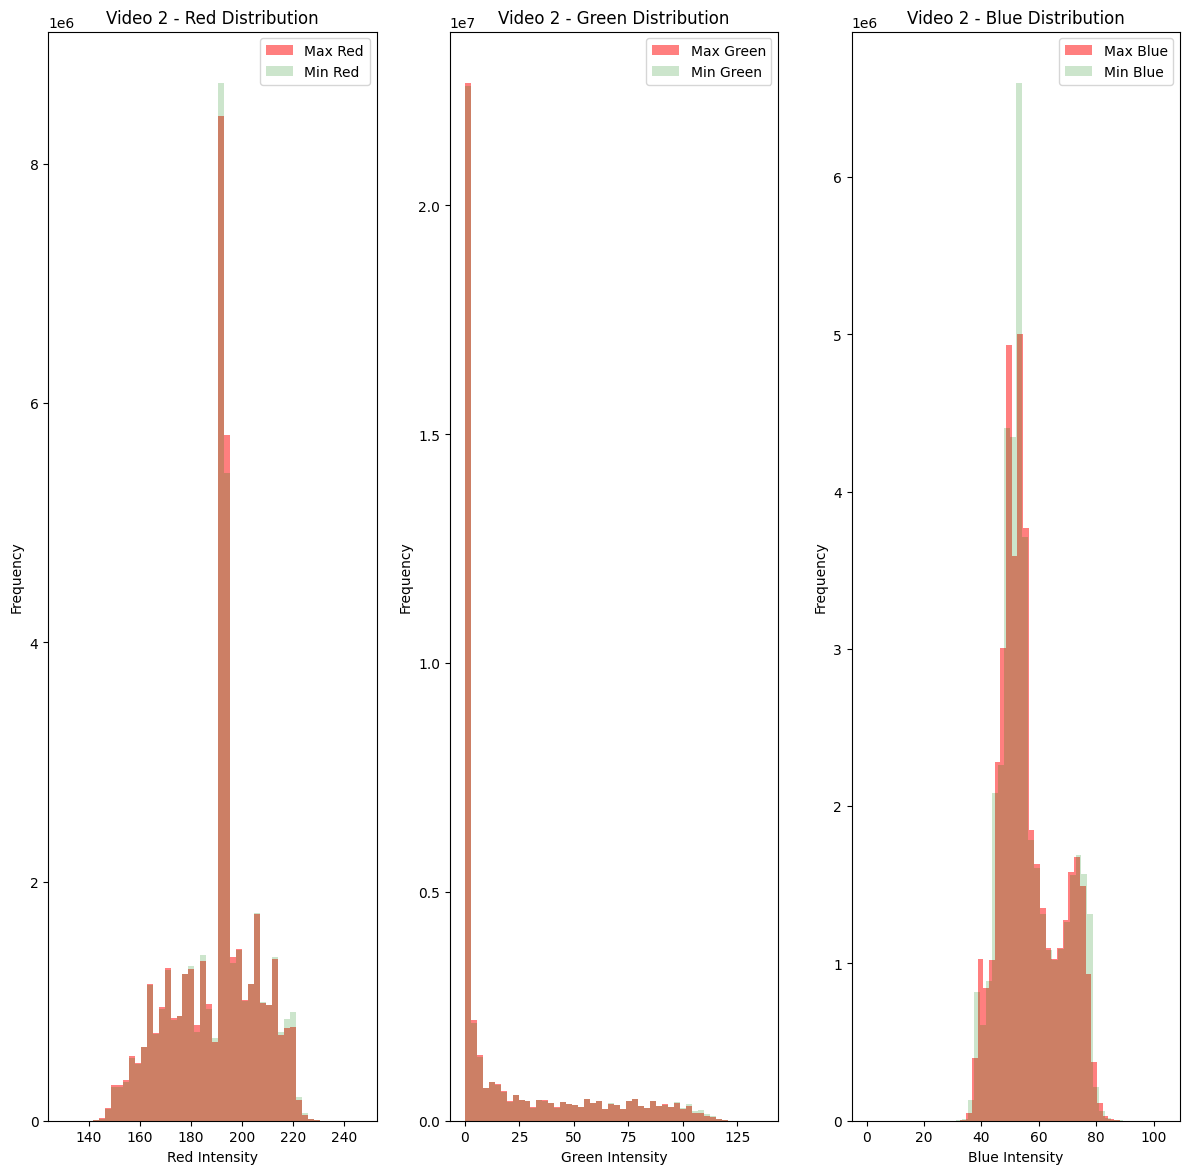

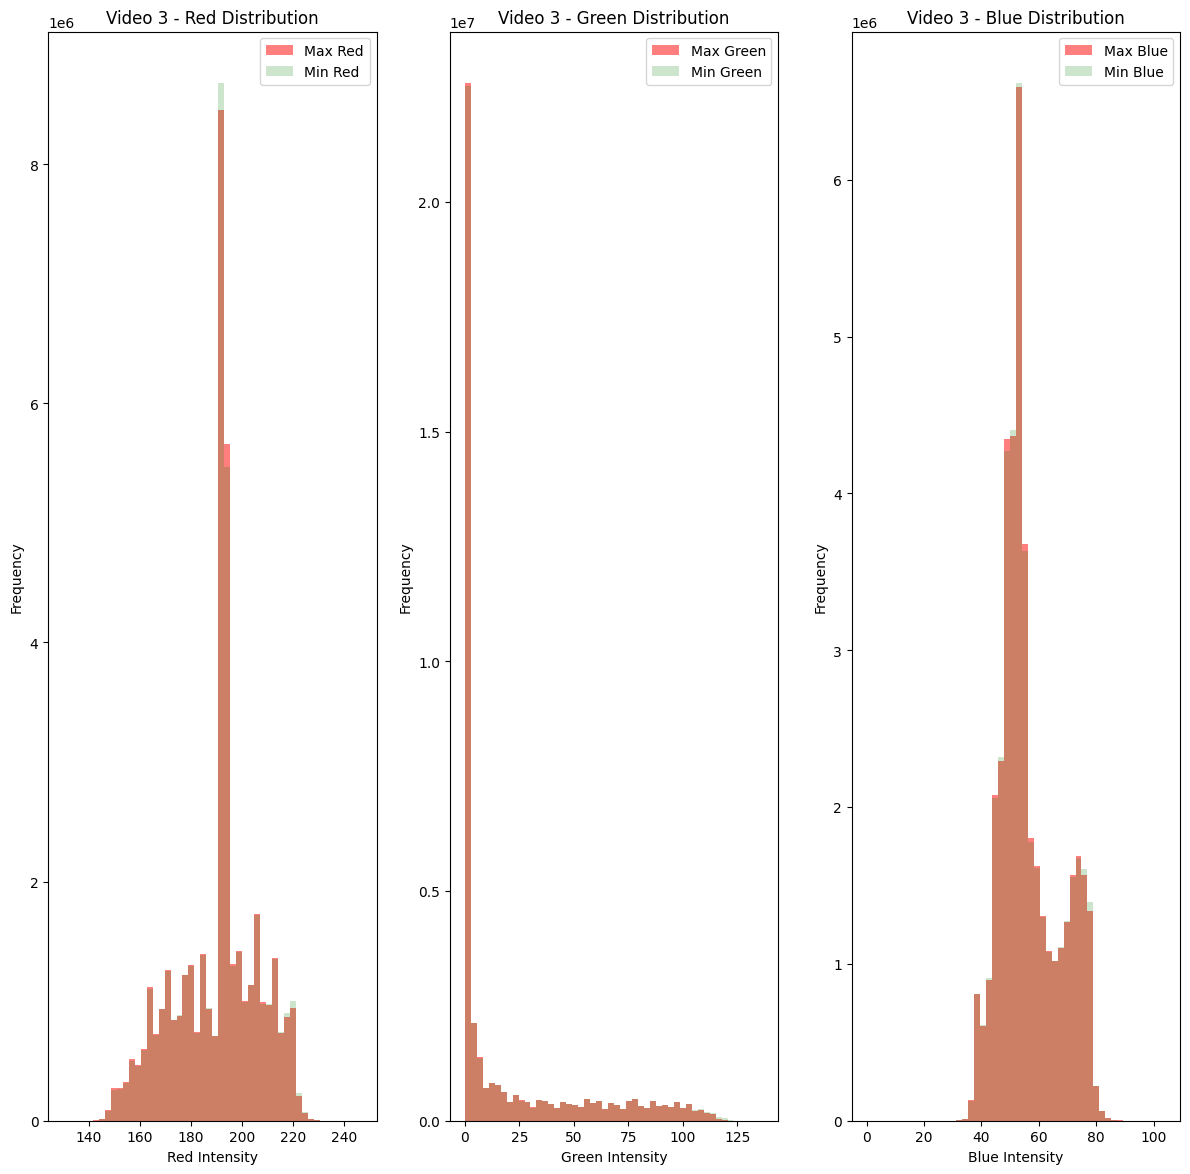

In [5]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

def select_extreme_frames(intensity, videoIndex, numFrames=20):
    # Find maxima and minima
    maxima, _ = find_peaks(intensity, distance=framesPerSecondValues[videoIndex] * 0.5)
    minima, _ = find_peaks(-np.array(intensity), distance=framesPerSecondValues[videoIndex] * 0.5)
    
    # If there are not enough maxima or minima, augment with neighboring frames
    if len(maxima) < numFrames:
        additionalMax = np.setdiff1d(np.arange(len(intensity)), maxima)  # Find frames not in maxima
        additionalMax = additionalMax[:numFrames - len(maxima)]  # Select enough to fill the gap
        maxFrames = np.concatenate((maxima, additionalMax))
    else:
        maxFrames = maxima[:numFrames]
        
    if len(minima) < numFrames:
        additionalMin = np.setdiff1d(np.arange(len(intensity)), minima)  # Find frames not in minima
        additionalMin = additionalMin[:numFrames - len(minima)]  # Select enough to fill the gap
        minFrames = np.concatenate((minima, additionalMin))
    else:
        minFrames = minima[:numFrames]

    # Sort frames to maintain order
    maxFrames = np.sort(maxFrames)
    minFrames = np.sort(minFrames)

    return maxFrames, minFrames

# Function to extract R, G, B values from selected frames
def extract_rgb_values_histogram_1D(frames, videoIndex):
    if len(frames) == 0:  # Handle case where no frames are selected
        return np.array([]), np.array([]), np.array([])
    
    redValues, greenValues, blueValues = [], [], []

    for frameIndex in frames:
        frame = videoFrames[videoIndex][frameIndex]
        blue, green, red = cv2.split(frame)
        
        redValues.append(red.ravel())
        greenValues.append(green.ravel())
        blueValues.append(blue.ravel())

    return np.concatenate(redValues), np.concatenate(greenValues), np.concatenate(blueValues)

# Plot histograms for R, G, B values in both cases
def plot_histograms(redMax, greenMax, blueMax, redMin, greenMin, blueMin, videoIndex):
    
    if len(redMax) == 0 or len(redMin) == 0:
        print(f"Not enough data for Video {videoIndex} to plot histograms.")
        return
    
    colors = ['red', 'green', 'blue']
    channels = ['Red', 'Green', 'Blue']
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 12))
    
    for i, (max_vals, min_vals) in enumerate(zip([redMax, greenMax, blueMax], [redMin, greenMin, blueMin])):
        # Plot max case
        axs[i].hist(max_vals, bins=50, color='red', alpha=0.5, label=f'Max {channels[i]}')
        # axs[i].set_title(f'Video {videoIndex} - Max {channels[i]} Distribution')
        # axs[i].set_xlabel(f'{channels[i]} Intensity')
        # axs[i].set_ylabel('Frequency')
        # axs[i].legend()
        
        # Plot min case
        axs[i].hist(min_vals, bins=50, color='green', alpha=0.2, label=f'Min {channels[i]}')
        axs[i].set_title(f'Video {videoIndex} - {channels[i]} Distribution')
        axs[i].set_xlabel(f'{channels[i]} Intensity')
        axs[i].set_ylabel('Frequency')
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Create dictionaries to store maxFrames and minFrames for each video
maxFrames = {}
minFrames = {}

# For each video, select frames near maxima and minima and plot histograms
for videoIndex in videoFrames:
    # Get intensity values for the 5-second chunk
    intensityChunk = chunks[videoIndex]
    
    # Select 20 frames near maxima and minima
    maxFrame, minFrame = select_extreme_frames(intensityChunk, videoIndex)
    # Store maxFrames and minFrames for the given videoIndex
    maxFrames[videoIndex] = maxFrame
    minFrames[videoIndex] = minFrame
    
    # Extract R, G, B values for the selected frames
    redMax, greenMax, blueMax = extract_rgb_values_histogram_1D(maxFrame, videoIndex)
    redMin, greenMin, blueMin = extract_rgb_values_histogram_1D(minFrame, videoIndex)
    
    # Plot histograms for R, G, B distributions
    plot_histograms(redMax, greenMax, blueMax, redMin, greenMin, blueMin, videoIndex)


In [6]:
# def select_extreme_frames(intensity, videoIndex, numFrames=20):
#     # Find maxima and minima
#     maxima, _ = find_peaks(intensity, distance=framesPerSecondValues[videoIndex] * 0.5)
#     minima, _ = find_peaks(-np.array(intensity), distance=framesPerSecondValues[videoIndex] * 0.5)
    
#     # If there are not enough maxima or minima, augment with neighboring frames
#     if len(maxima) < numFrames:
#         additionalMax = np.setdiff1d(np.arange(len(intensity)), maxima)  # Find frames not in maxima
#         additionalMax = additionalMax[:numFrames - len(maxima)]  # Select enough to fill the gap
#         maxFrames = np.concatenate((maxima, additionalMax))
#     else:
#         maxFrames = maxima[:numFrames]
        
#     if len(minima) < numFrames:
#         additionalMin = np.setdiff1d(np.arange(len(intensity)), minima)  # Find frames not in minima
#         additionalMin = additionalMin[:numFrames - len(minima)]  # Select enough to fill the gap
#         minFrames = np.concatenate((minima, additionalMin))
#     else:
#         minFrames = minima[:numFrames]

#     # Sort frames to maintain order
#     maxFrames = np.sort(maxFrames)
#     minFrames = np.sort(minFrames)

#     return maxFrames, minFrames

# # Function to extract R, G, B values from selected frames
# def extract_rgb_values_histogram_1D(frames, videoIndex):
#     if len(frames) == 0:  # Handle case where no frames are selected
#         return np.array([]), np.array([]), np.array([])

#     redValues, greenValues, blueValues = [], [], []

#     for frameIndex in frames:
#         frame = videoFrames[videoIndex][frameIndex]
#         blue, green, red = cv2.split(frame)
        
#         redValues.append(red.ravel())
#         greenValues.append(green.ravel())
#         blueValues.append(blue.ravel())

#     return np.concatenate(redValues), np.concatenate(greenValues), np.concatenate(blueValues)

# # Plot combined histograms for R, G, B values from maxima and minima frames
# def plot_combined_histograms(redCombined, greenCombined, blueCombined, videoIndex):
#     if len(redCombined) == 0 or len(greenCombined) == 0 or len(blueCombined) == 0:
#         print(f"Not enough data for Video {videoIndex} to plot histograms.")
#         return
    
#     colors = ['red', 'green', 'blue']
#     channels = ['R', 'G', 'B']
#     combined_vals = [redCombined, greenCombined, blueCombined]
    
#     fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
#     for i, (vals, color, channel) in enumerate(zip(combined_vals, colors, channels)):
#         axs[i].hist(vals, bins=50, color=color, alpha=0.7, label=f'{channel} Combined')
#         axs[i].set_title(f'Video {videoIndex} - Combined {channel} Distribution')
#         axs[i].set_xlabel(f'{channel} Intensity')
#         axs[i].set_ylabel('Frequency')
#         axs[i].legend()

#     plt.tight_layout()
#     plt.show()

# # Create dictionaries to store maxFrames and minFrames for each video
# maxFrames = {}
# minFrames = {}

# # For each video, select frames near maxima and minima and plot combined histograms
# for videoIndex in videoFrames:
#     # Get intensity values for the 5-second chunk
#     intensityChunk = chunks[videoIndex]
    
#     # Select 20 frames near maxima and minima
#     maxFrame, minFrame = select_extreme_frames(intensityChunk, videoIndex)
#     # Store maxFrames and minFrames for the given videoIndex
#     maxFrames[videoIndex] = maxFrame
#     minFrames[videoIndex] = minFrame
    
#     # Extract R, G, B values for maxima and minima frames
#     redMax, greenMax, blueMax = extract_rgb_values_histogram_1D(maxFrame, videoIndex)
#     redMin, greenMin, blueMin = extract_rgb_values_histogram_1D(minFrame, videoIndex)
    
#     # Combine max and min values for R, G, B channels
#     redCombined = np.concatenate([redMax, redMin])
#     greenCombined = np.concatenate([greenMax, greenMin])
#     blueCombined = np.concatenate([blueMax, blueMin])
    
#     # Plot histograms for combined R, G, B distributions
#     plot_combined_histograms(redCombined, greenCombined, blueCombined, videoIndex)


In [7]:
# def select_extreme_frames(intensity, videoIndex, numFrames=20):
#     # Find maxima and minima
#     maxima, _ = find_peaks(intensity, distance=framesPerSecondValues[videoIndex] * 0.5)
#     minima, _ = find_peaks(-np.array(intensity), distance=framesPerSecondValues[videoIndex] * 0.5)
    
#     # If there are not enough maxima or minima, augment with neighboring frames
#     if len(maxima) < numFrames:
#         additionalMax = np.setdiff1d(np.arange(len(intensity)), maxima)  # Find frames not in maxima
#         additionalMax = additionalMax[:numFrames - len(maxima)]  # Select enough to fill the gap
#         maxFrames = np.concatenate((maxima, additionalMax))
#     else:
#         maxFrames = maxima[:numFrames]
        
#     if len(minima) < numFrames:
#         additionalMin = np.setdiff1d(np.arange(len(intensity)), minima)  # Find frames not in minima
#         additionalMin = additionalMin[:numFrames - len(minima)]  # Select enough to fill the gap
#         minFrames = np.concatenate((minima, additionalMin))
#     else:
#         minFrames = minima[:numFrames]

#     # Sort frames to maintain order
#     maxFrames = np.sort(maxFrames)
#     minFrames = np.sort(minFrames)

#     return maxFrames, minFrames

# # Function to extract R, G, B values from selected frames without averaging
# def extract_rgb_values_histogram_1D(frames, videoIndex):
#     if len(frames) == 0:  # Handle case where no frames are selected
#         return np.array([]), np.array([]), np.array([])

#     redValues, greenValues, blueValues = [], [], []

#     for frameIndex in frames:
#         frame = videoFrames[videoIndex][frameIndex]
#         blue, green, red = cv2.split(frame)
        
#         redValues.append(red.ravel())
#         greenValues.append(green.ravel())
#         blueValues.append(blue.ravel())

#     return redValues, greenValues, blueValues

# # Plot histograms for the average of maxima and minima frames
# def plot_average_histograms(redMax, greenMax, blueMax, redMin, greenMin, blueMin, videoIndex):
#     if len(redMax) == 0 or len(redMin) == 0:
#         print(f"Not enough data for Video {videoIndex} to plot histograms.")
#         return
    
#     colors = ['red', 'green', 'blue']
#     channels = ['R', 'G', 'B']
    
#     # Calculate the averages of max and min for each channel
#     avgRed = (np.mean(redMax, axis=0) + np.mean(redMin, axis=0)) / 2
#     avgGreen = (np.mean(greenMax, axis=0) + np.mean(greenMin, axis=0)) / 2
#     avgBlue = (np.mean(blueMax, axis=0) + np.mean(blueMin, axis=0)) / 2

#     # Prepare values for plotting
#     avgreenValues = [avgRed, avgGreen, avgBlue]
    
#     fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
#     for i, (vals, color, channel) in enumerate(zip(avgreenValues, colors, channels)):
#         axs[i].hist(vals, bins=50, color=color, alpha=0.7, label=f'{channel} Average')
#         axs[i].set_title(f'Video {videoIndex} - Average {channel} Channel')
#         axs[i].set_xlabel(f'{channel} Intensity')
#         axs[i].set_ylabel('Frequency')
#         axs[i].legend()

#     plt.tight_layout()
#     plt.show()

# # Create dictionaries to store maxFrames and minFrames for each video
# maxFrames = {}
# minFrames = {}

# # For each video, select frames near maxima and minima and plot average histograms
# for videoIndex in videoFrames:
#     # Get intensity values for the 5-second chunk
#     intensityChunk = chunks[videoIndex]
    
#     # Select 20 frames near maxima and minima
#     maxFrame, minFrame = select_extreme_frames(intensityChunk, videoIndex)
#     # Store maxFrames and minFrames for the given videoIndex
#     maxFrames[videoIndex] = maxFrame
#     minFrames[videoIndex] = minFrame
    
#     # Extract R, G, B values for maxima and minima frames
#     redMax, greenMax, blueMax = extract_rgb_values_histogram_1D(maxFrame, videoIndex)
#     redMin, greenMin, blueMin = extract_rgb_values_histogram_1D(minFrame, videoIndex)
    
#     # Plot histograms for average R, G, B distributions (averaged from maxima and minima)
#     plot_average_histograms(redMax, greenMax, blueMax, redMin, greenMin, blueMin, videoIndex)


#### E. Threshold Based Detection and ROC curve [25 marks]
Only consider the "R" channel for analysis. Suppose, we just use a single pixel (uniformly randomly chosen in the frame) to detect whether the frame belongs to case 1 or case 2. You can denote the "Case 1" to be the POSITIVE event/hypothesis and "Case 2" to be the NEGATIVE event/null hypothesis. For every threshold value, for every frame, choose 500 random pixels. Compute the "Probability of Detection" ($P_D$) and "Probability of False Alarm" ($P_{FA}$). Note that you have (20 + 20) = 40 frames, and 500 detections per frame, i.e., 20000 total detections. Plot the $ROC$ curve. Which one has the best ROC curve (Dataset 1, 2 or 3)?

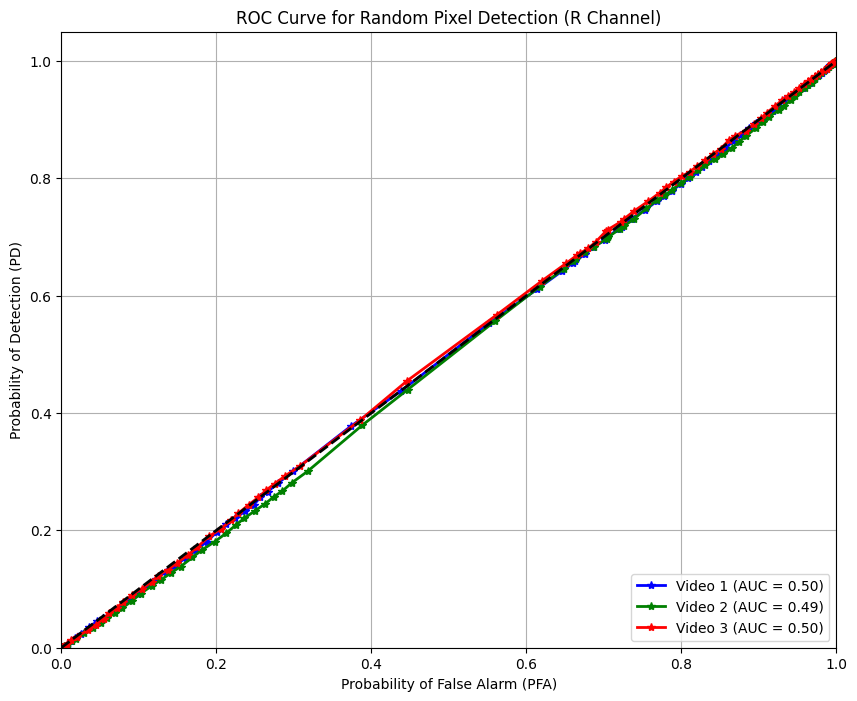

Video 1 AUC Score: 0.50
Video 2 AUC Score: 0.49
Video 3 AUC Score: 0.50

The video with the best ROC curve (highest AUC) is Video 3 with an AUC score of 0.50


In [8]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

# Function to compute the ROC curve
def compute_roc_curve(redPixelsMax, redPixelsMin):

    # Create labels: 1 for case 1 (positive), 0 for case 2 (negative)
    labels = np.concatenate([np.ones(len(redPixelsMax)), np.zeros(len(redPixelsMin))])

    # Concatenate the R channel pixel intensities
    pixelValues = np.concatenate([redPixelsMax, redPixelsMin])

    # Loop over a range of thresholds to calculate PD and PFA
    pfa, pd, thresholds = roc_curve(labels, pixelValues)
    rocAuc = auc(pfa, pd)

    return pfa, pd, thresholds, rocAuc

# Function to extract R, G, B values from selected frames
def extract_rgb_values_2D(frames, videoIndex):
    redFrames = []
    greenFrames = []
    blueFrames = []

    for frameIndex in frames:
        frame = videoFrames[videoIndex][frameIndex]
        blue, green, red = cv2.split(frame)  # Separate B, G, R channels
        
        redFrames.append(red)
        greenFrames.append(green)
        blueFrames.append(blue)

    return redFrames, greenFrames, blueFrames

# Function to randomly select 500 pixels from each frame
def random_pixel_selection(frames, numPixels=500):
    selectedPixels = []

    for frame in frames:
        # Get the dimensions of the frame (height, width)
        height, width = frame.shape

        # Randomly select pixels from the flattened array of pixel values
        randomIndices = np.random.choice(height * width, numPixels, replace=False)
        selectedPixels.append(frame.ravel()[randomIndices])  # Extract pixel values

    return np.concatenate(selectedPixels)

def get_red_pixels_max_min(redMax, redMin):
    redPixelsMax = random_pixel_selection(redMax)
    redPixelsMin = random_pixel_selection(redMin)

    return redPixelsMax, redPixelsMin

# Plot ROC curves for all videos
def plot_roc_curves():
    colors = ['blue', 'green', 'red']
    aucScores = {}
    pdPfaThresholds = {}  # To store PD and PFA values for each video
    redPixels = {}
    plt.figure(figsize=(10, 8))

    for index, videoIndex in enumerate(videoFrames):
        # Extract R channel frames for max and min cases
        redMax, _, _ = extract_rgb_values_2D(maxFrames[videoIndex], videoIndex)
        redMin, _, _ = extract_rgb_values_2D(minFrames[videoIndex], videoIndex)

        # Select 500 random pixels from each frame in both cases
        redPixelsMax, redPixelsMin = get_red_pixels_max_min(redMax, redMin)

        # Store Red pixels max and min
        redPixels[videoIndex] = {"RedPixelsMax": redPixelsMax, "RedPixelsMin": redPixelsMin}

        # Compute ROC curve
        pfa, pd, thresholds, rocAuc = compute_roc_curve(redPixelsMax, redPixelsMin)

        # Store AUC score
        aucScores[videoIndex] = rocAuc

        # Store PD (tpr) and PFA (fpr) for each video
        pdPfaThresholds[videoIndex] = {"PD": pd, "PFA": pfa, "Thresholds": thresholds}

        # Plot ROC curve
        plt.plot(pfa, pd, color=colors[index], lw=2, label=f'Video {videoIndex} (AUC = {rocAuc:.2f})', marker='*')

    # Add diagonal reference line for random guessing
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Probability of False Alarm (PFA)')
    plt.ylabel('Probability of Detection (PD)')
    plt.title('ROC Curve for Random Pixel Detection (R Channel)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return aucScores, pdPfaThresholds, redPixels

# Call the function to plot ROC curves for all three videos
aucScores, pdPfaThresholds, redPixels = plot_roc_curves()

# Print AUC scores for each video
for videoIndex, aucScore in aucScores.items():
    print(f"Video {videoIndex} AUC Score: {aucScore:.2f}")

# Determine the video with the best AUC score
bestVideoId = max(aucScores, key=aucScores.get)
print(f"\nThe video with the best ROC curve (highest AUC) is Video {bestVideoId} with an AUC score of {aucScores[bestVideoId]:.2f}")

# Print PD and PFA values for each video
# for video_id, values in pdPfaThresholds.items():
#     pd_values = values["PD"]
#     pfa_values = values["PFA"]
#     thres_values = values["Thresholds"]
#     print(f"\nVideo {video_id} PD and PFA values:")
#     for i, (pd, pfa) in enumerate(zip(pd_values, pfa_values)):
#         print(f"Threshold {i+1}: PD = {pd:.4f}, PFA = {pfa:.4f}, Thresholds = {thres_values}")


#### F. Are "good" samples spatially correlated? [20 marks]
First, choose an optimal threshold, $T_{OPT}$, that best suits your data (maximize $P_D$ while minimizing $P_{FA}$, you may look into maximizing the $\frac{P_D}{P_{FA}}$ ratio). Out of the 20000 total detections above for $T_{OPT}$, can it be hypothesised that the "good" samples (true positives and true negatives) are spatially clustered in certain areas of the frame, compared to the "bad" samples (false positives and false negatives)?

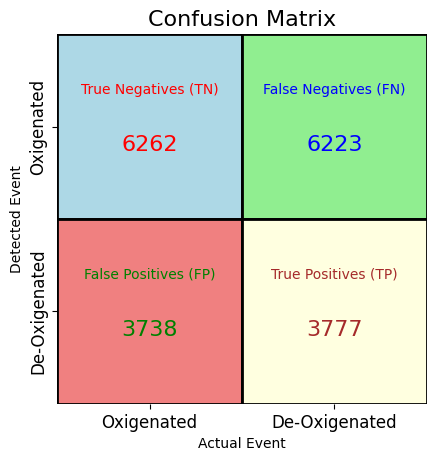

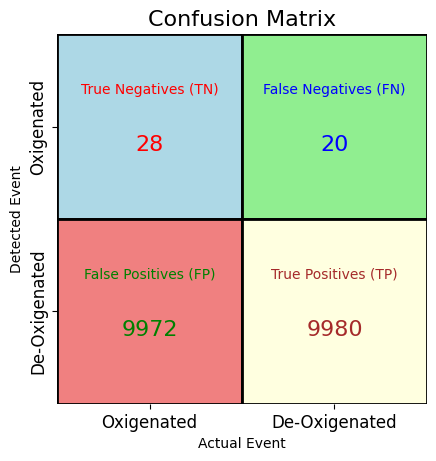

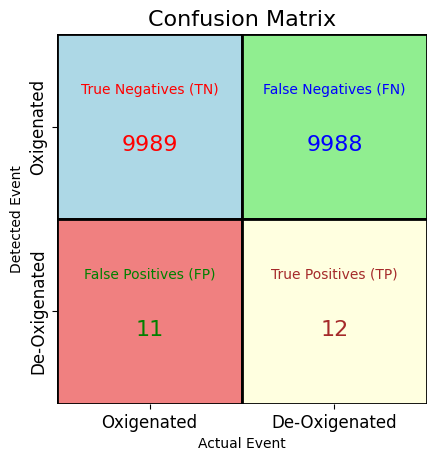

In [9]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

# Function to find optimal threshold T_OPT
def find_optimal_threshold(pfa, pd, thresholds):

    # Calculate the PD/PFA ratio for each threshold
    pd_pfa_ratios = pd / (pfa + 1e-6)  # Adding a small value to avoid division by zero

    # Find the index of the maximum ratio
    optimal_idx = np.argmax(pd_pfa_ratios)
    
    # Get the optimal threshold and corresponding PD and PFA
    T_OPT = thresholds[optimal_idx]
    max_pd = pd[optimal_idx]
    min_pfa = pfa[optimal_idx]
    
    return T_OPT, max_pd, min_pfa

# # Function to classify samples based on T_OPT
# def classify_samples(R_pixels_case1, R_pixels_case2, T_OPT):
#     true_positives = R_pixels_case1[R_pixels_case1 >= T_OPT]
#     false_negatives = R_pixels_case1[R_pixels_case1 < T_OPT]
#     false_positives = R_pixels_case2[R_pixels_case2 >= T_OPT]
#     true_negatives = R_pixels_case2[R_pixels_case2 < T_OPT]
    
#     return true_positives, true_negatives, false_positives, false_negatives

# # Function to plot spatial correlation of good and bad samples
# def plot_spatial_correlation(locations, labels, frame_shape):
#     plt.figure(figsize=(8, 8))
#     plt.imshow(np.zeros(frame_shape), cmap='gray')  # Blank frame background

#     # Plot different sample types in different colors
#     for loc, label in zip(locations, labels):
#         x, y = loc
#         if label == "TP":
#             plt.scatter(x, y, color='green', alpha=0.6, label="TP" if "TP" not in plt.gca().get_legend_handles_labels()[1] else "")
#         elif label == "TN":
#             plt.scatter(x, y, color='blue', alpha=0.6, label="TN" if "TN" not in plt.gca().get_legend_handles_labels()[1] else "")
#         elif label == "FP":
#             plt.scatter(x, y, color='red', alpha=0.6, label="FP" if "FP" not in plt.gca().get_legend_handles_labels()[1] else "")
#         elif label == "FN":
#             plt.scatter(x, y, color='orange', alpha=0.6, label="FN" if "FN" not in plt.gca().get_legend_handles_labels()[1] else "")
    
#     plt.legend(loc="upper right")
#     plt.title("Spatial Correlation of Good and Bad Samples")
#     plt.xlabel("Width")
#     plt.ylabel("Height")
    
#     # Invert the y-axis to have (0, 0) at the top left
#     plt.gca().invert_yaxis()

#     plt.show()


# # Assuming pixel locations for TP, TN, FP, FN are available or can be determined as previously described
# for videoIndex in videoFrames:
#     frameHeight = int(frameHeightValues[videoIndex])
#     frameWidth = int(frameHeightValues[videoIndex])

#     pfa = pdPfaThresholds[videoIndex]["PFA"]
#     pd = pdPfaThresholds[videoIndex]["PD"]
#     thresholds = pdPfaThresholds[videoIndex]["Thresholds"]
    
#     # Find optimal threshold for each video
#     T_OPT, max_pd, min_pfa = find_optimal_threshold(pfa, pd, thresholds)

#     redPixelsMax = redPixels[videoIndex]["RedPixelsMax"]
#     redPixelsMin = redPixels[videoIndex]["RedPixelsMin"]
#     # Classify the samples based on T_OPT
#     TP, TN, FP, FN = classify_samples(redPixelsMax, redPixelsMin, T_OPT)

#     # Assuming pixel locations are available in `pixel_locations_case1` and `pixel_locations_case2`
#     sample_size = 500  # Set fixed sample size
#     pixel_locations_tp = [(np.random.randint(0, frameHeight), np.random.randint(0, frameWidth)) for _ in range(min(sample_size, len(TP)))]
#     pixel_locations_tn = [(np.random.randint(0, frameHeight), np.random.randint(0, frameWidth)) for _ in range(min(sample_size, len(TN)))]
#     pixel_locations_fp = [(np.random.randint(0, frameHeight), np.random.randint(0, frameWidth)) for _ in range(min(sample_size, len(FP)))]
#     pixel_locations_fn = [(np.random.randint(0, frameHeight), np.random.randint(0, frameWidth)) for _ in range(min(sample_size, len(FN)))]

#     # Combine all locations and labels for plotting
#     all_locations = pixel_locations_tp + pixel_locations_tn + pixel_locations_fp + pixel_locations_fn

#     all_labels = (["TP"] * len(pixel_locations_tp)) + (["TN"] * len(pixel_locations_tn)) + \
#                  (["FP"] * len(pixel_locations_fp)) + (["FN"] * len(pixel_locations_fn))

#     # Plot the spatial correlation of good and bad samples
#     plot_spatial_correlation(all_locations, all_labels, frame_shape=(frameHeight, frameWidth))

def classify_samples(R_pixels_case1, R_pixels_case2, frameHeight, frameWidth, T_OPT):
    # Identify pixel coordinates for each category
    true_positives = [(i % frameHeight, i // frameHeight) for i in range(len(R_pixels_case1)) if R_pixels_case1[i] >= T_OPT]
    false_negatives = [(i % frameHeight, i // frameHeight) for i in range(len(R_pixels_case1)) if R_pixels_case1[i] < T_OPT]
    false_positives = [(i % frameHeight, i // frameHeight) for i in range(len(R_pixels_case2)) if R_pixels_case2[i] >= T_OPT]
    true_negatives = [(i % frameHeight, i // frameHeight) for i in range(len(R_pixels_case2)) if R_pixels_case2[i] < T_OPT]

    return true_positives, true_negatives, false_positives, false_negatives


def plot_spatial_correlation_v2(TP, TN, FP, FN, frame_shape):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    blank_background = np.zeros(frame_shape)

    # Plot True Negatives (TN)
    axs[0, 0].imshow(blank_background, cmap='gray')
    axs[0, 0].set_title("True Negatives (TN)")
    if TN:
        axs[0, 0].scatter(*zip(*TN), color='blue', alpha=0.6)

    # Plot False Negatives (FN)
    axs[0, 1].imshow(blank_background, cmap='gray')
    axs[0, 1].set_title("False Negatives (FN)")
    if FN:
        axs[0, 1].scatter(*zip(*FN), color='orange', alpha=0.6)

    # Plot False Positives (FP)
    axs[1, 0].imshow(blank_background, cmap='gray')
    axs[1, 0].set_title("False Positives (FP)")
    if FP:
        axs[1, 0].scatter(*zip(*FP), color='red', alpha=0.6)

    # Plot True Positives (TP)
    axs[1, 1].imshow(blank_background, cmap='gray')
    axs[1, 1].set_title("True Positives (TP)")
    if TP:
        axs[1, 1].scatter(*zip(*TP), color='green', alpha=0.6)

    # Set common labels
    for ax in axs.flat:
        ax.label_outer()
    axs[0, 0].set_xlabel("Actual Event: Absence")
    axs[0, 1].set_xlabel("Actual Event: Presence")
    axs[1, 0].set_xlabel("Detected Event: Absence")
    axs[1, 1].set_xlabel("Detected Event: Presence")
    axs[0, 0].set_ylabel("Detected Event: Absence")
    axs[1, 0].set_ylabel("Detected Event: Presence")

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(TP, TN, FP, FN, frame_shape):
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    blank_background = np.ones(frame_shape)  # White background

    # Function to add a black border around each subplot
    def add_border(ax):
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(3)  # Increased line width for better visibility

    # Plot True Negatives (TN)
    axs[0, 0].imshow(blank_background, cmap='gray', vmin=0, vmax=1)
    axs[0, 0].set_title("True Negatives (TN)")
    if TN:
        axs[0, 0].scatter(*zip(*TN), color='blue', alpha=0.6)
    axs[0, 0].axis('off')  # Hide axis
    add_border(axs[0, 0])  # Add border

    # Plot False Negatives (FN)
    axs[0, 1].imshow(blank_background, cmap='gray', vmin=0, vmax=1)
    axs[0, 1].set_title("False Negatives (FN)")
    if FN:
        axs[0, 1].scatter(*zip(*FN), color='orange', alpha=0.6)
    axs[0, 1].axis('off')  # Hide axis
    add_border(axs[0, 1])  # Add border

    # Plot False Positives (FP)
    axs[1, 0].imshow(blank_background, cmap='gray', vmin=0, vmax=1)
    axs[1, 0].set_title("False Positives (FP)")
    if FP:
        axs[1, 0].scatter(*zip(*FP), color='red', alpha=0.6)
    axs[1, 0].axis('off')  # Hide axis
    add_border(axs[1, 0])  # Add border

    # Plot True Positives (TP)
    axs[1, 1].imshow(blank_background, cmap='gray', vmin=0, vmax=1)
    axs[1, 1].set_title("True Positives (TP)")
    if TP:
        axs[1, 1].scatter(*zip(*TP), color='green', alpha=0.6)
    axs[1, 1].axis('off')  # Hide axis
    add_border(axs[1, 1])  # Add border

    # Set common labels for Actual and Detected Event
    plt.figtext(0.5, 1.05, "Actual Event", ha='center', va='center', fontsize=12)
    plt.figtext(-0.05, 0.5, "Detected Event", ha='center', va='center', rotation='vertical', fontsize=12)

    plt.tight_layout()
    plt.show()

# def plot_confusion_matrix_with_colored_counts(TP, TN, FP, FN, frame_shape):
#     # Create a figure with specified size
#     fig, axs = plt.subplots(2, 2, figsize=(4, 4), facecolor='none')  # Reduced size
#     # Remove blank background

#     # Function to add a black border around each subplot
#     def add_border(ax):
#         for spine in ax.spines.values():
#             spine.set_edgecolor('black')
#             spine.set_linewidth(2)  # Set line width for better visibility

#     # Function to display the count in the center of the plot with specific color
#     def display_count(ax, count, title, zone_color, text_color):
#         ax.set_facecolor(zone_color)  # Set background color for the zone
#         ax.set_title(title)
#         ax.axis('off')  # Hide axis
#         ax.text(0.5, 0.5, str(count), fontsize=16, ha='center', va='center', color=text_color)

#     # Plot True Negatives (TN)
#     display_count(axs[0, 0], len(TN), "True Negatives (TN)", "red", "red")
#     add_border(axs[0, 0])  # Add border

#     # Plot False Negatives (FN)
#     display_count(axs[0, 1], len(FN), "False Negatives (FN)", "lightcoral", "green")
#     add_border(axs[0, 1])  # Add border

#     # Plot False Positives (FP)
#     display_count(axs[1, 0], len(FP), "False Positives (FP)", "lightgreen", "blue")
#     add_border(axs[1, 0])  # Add border

#     # Plot True Positives (TP)
#     display_count(axs[1, 1], len(TP), "True Positives (TP)", "lightyellow", "brown")
#     add_border(axs[1, 1])  # Add border

#     # Set common labels for Actual and Detected Event
#     plt.figtext(0.5, 1.05, "Actual Event", ha='center', va='center', fontsize=10)
#     plt.figtext(-0.05, 0.5, "Detected Event", ha='center', va='center', rotation='vertical', fontsize=10)

#     plt.subplots_adjust(wspace=0.3, hspace=0.3)
#     plt.show()

# def plot_confusion_matrix_with_colored_counts(TP, TN, FP, FN):
#     # Create a figure with specified size
#     fig, axs = plt.subplots(2, 2, figsize=(4, 4))

#     # Define text colors
#     zone_colors = {
#         "TN": "lightblue",
#         "FN": "lightcoral",
#         "FP": "lightgreen",
#         "TP": "lightyellow"
#     }

#     # Define zone colors
#     text_colors = {
#         "TN": "red",
#         "FN": "blue",
#         "FP": "green",
#         "TP": "brown"
#     }

#     # Function to display the count in the center of the plot with specific color
#     def display_count(ax, count, title, zone_color, text_color):
#         ax.set_facecolor(zone_color)  # Set background color for the zone
#         ax.set_title(title, color=text_color)
#         ax.axis('off')  # Hide axis
#         ax.text(0.5, 0.5, str(count), fontsize=16, ha='center', va='center', color=text_color)

#         # Draw a black border around the zone
#         for spine in ax.spines.values():
#             spine.set_edgecolor('black')
#             spine.set_linewidth(20)  # Set line width for better visibility

#     # Plot True Negatives (TN)
#     display_count(axs[0, 0], len(TN), "True Negatives (TN)", zone_colors["TN"], text_colors["TN"])

#     # Plot False Negatives (FN)
#     display_count(axs[0, 1], len(FN), "False Negatives (FN)", zone_colors["FN"], text_colors["FN"])

#     # Plot False Positives (FP)
#     display_count(axs[1, 0], len(FP), "False Positives (FP)", zone_colors["FP"], text_colors["FP"])

#     # Plot True Positives (TP)
#     display_count(axs[1, 1], len(TP), "True Positives (TP)", zone_colors["TP"], text_colors["TP"])

#     # Set common labels for Actual and Detected Event
#     plt.figtext(0.5, 1.05, "Actual Event", ha='center', va='center', fontsize=10)
#     plt.figtext(-0.05, 0.5, "Detected Event", ha='center', va='center', rotation='vertical', fontsize=10)

#     # Remove the white background of the figure and set figure background color
#     # fig.patch.set_facecolor('white')  # This sets the overall figure background
#     plt.subplots_adjust(wspace=0.3, hspace=0.3)
#     plt.show()

def plot_confusion_matrix_with_colored_counts(TP, TN, FP, FN):

    # Define zone colors and text colors
    zone_colors = {
        "TN": "lightblue",
        "FN": "lightgreen",
        "FP": "lightcoral",
        "TP": "lightyellow"
    }

    text_colors = {
        "TN": "red",
        "FN": "blue",
        "FP": "green",
        "TP": "brown"
    }

    title_text = {
        "TN": "True Negatives (TN)",
        "FN": "False Negatives (FN)",
        "FP": "False Positives (FP)",
        "TP": "True Positives (TP)"
    }

    # Create a confusion matrix from the inputs
    cm = np.array([[TP, TN], [FP, FN]])
    title = np.array([['TN', 'FN'], ['FP', 'TP']])

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a heatmap with each cell having its specified color
    sns.heatmap(cm, annot=False, 
                linewidths=1, linecolor='black', cbar=False, ax=ax,
                square=True)

    # Manually set the colors for each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=zone_colors[title[i, j]], ec='black', lw=2))


    # Add labels to the zones
    zone_labels = np.array([[TN, FN], [FP, TP]])


    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j + 0.5, i + 0.3, title_text[title[i, j]],
                    ha='center', va='center', color=text_colors[title[i, j]], fontsize=10)
            ax.text(j + 0.5, i + 0.6, str(zone_labels[i, j]),
                    ha='center', va='center', color=text_colors[title[i, j]], fontsize=16)

    # Set the labels
    ax.set_xlabel('Actual Event')
    ax.set_ylabel('Detected Event')
    ax.set_xticklabels(['Oxigenated', 'De-Oxigenated'], color='black', fontsize=12)
    ax.set_yticklabels(['Oxigenated', 'De-Oxigenated'], color='black', fontsize=12)

    # Set title
    plt.title('Confusion Matrix', fontsize=16)

    # Show the plot
    plt.show()

# Now you can call this function with actual pixel coordinates for TP, TN, FP, FN
for videoIndex in videoFrames:
    frameHeight = int(frameHeightValues[videoIndex])
    frameWidth = int(frameHeightValues[videoIndex])

    pfa = pdPfaThresholds[videoIndex]["PFA"]
    pd = pdPfaThresholds[videoIndex]["PD"]
    thresholds = pdPfaThresholds[videoIndex]["Thresholds"]
    
    # Find optimal threshold for each video
    T_OPT, max_pd, min_pfa = find_optimal_threshold(pfa, pd, thresholds)

    redPixelsMax = redPixels[videoIndex]["RedPixelsMax"]
    redPixelsMin = redPixels[videoIndex]["RedPixelsMin"]
    
    # Classify the samples based on T_OPT
    TP, TN, FP, FN = classify_samples(redPixelsMax, redPixelsMin, frameHeight, frameWidth, T_OPT)

    # Plot the spatial correlation of good and bad samples
    # plot_spatial_correlation_v2(TP, TN, FP, FN, frame_shape=(frameHeight, frameWidth))

    # Plot the confusion matrix
    # plot_confusion_matrix(TP, TN, FP, FN, frame_shape=(frameHeight, frameWidth))

    # plot_confusion_matrix_with_colored_counts(TP, TN, FP, FN, frame_shape=(frameHeight, frameWidth))
    # plot_confusion_matrix_with_colored_counts(TP, TN, FP, FN)
    plot_confusion_matrix_with_colored_counts(len(TP), len(TN), len(FP), len(FN))


#### Submission (report document: 10 marks)
##### Deadline: $6^{th}$, October, 2024
* Compress the top level directory (ZIP format) containing this notebook with filled-in code along with the ppgvideos folder.
* Include a PDF file (10 marks) within the directory, name it "report.pdf". Mention your name and roll number.
* The report should contain explanations related to the above assignments (A through F), assumptions if any, specific code explanations, algorithms used and inferences made from the plots. Also include references if any.
* <b>You MUST not consult your homework code with others</b>. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.
* Submissions after the deadline will not be entertained.